# Problem: Predicting Customer Churn
   Context:
You work for a subscription-based e-commerce company. Management wants to predict whether a customer is likely to churn (i.e., stop using the service), based on various customer attributes. You are tasked with building a logistic regression model for this classification problem.

# Load Dataset

In [ ]:
import pandas as pd

dataset = pd.read_csv('logistic_regression.csv')
print(dataset.info())
print(dataset.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1000 non-null   float64
 1   annual_income   1000 non-null   float64
 2   spending_score  1000 non-null   float64
 3   credit_score    1000 non-null   float64
 4   tenure          1000 non-null   float64
 5   website_visits  1000 non-null   float64
 6   churn           1000 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 54.8 KB
None
        age  annual_income  spending_score  credit_score    tenure  \
0 -0.223972       1.997859       -0.488679      1.948207  0.121027   
1  0.777847      -1.123052        0.594504     -1.413674  2.340408   
2 -0.211784       1.278195        0.878723      0.195537 -2.025308   
3 -0.073160      -0.919752        0.761690     -1.015440 -0.278717   
4  0.026560      -1.457111       -0.052511      1.264830  0.448972   

   website_vi

# Perform EDA

In [11]:
# Check for missing values
if dataset.isnull().values.any():
    print("Dataset contains missing values.")
else:
    print("No missing values found in the dataset.")
    print(dataset.isnull().sum())

No missing values found in the dataset.
age               0
annual_income     0
spending_score    0
credit_score      0
tenure            0
website_visits    0
churn             0
dtype: int64


In [14]:
# check Data Types
print("Data Types:")
print(dataset.dtypes)

Data Types:
age               float64
annual_income     float64
spending_score    float64
credit_score      float64
tenure            float64
website_visits    float64
churn               int64
dtype: object


In [16]:
# Analyze churn distribution
churn_distribution = dataset['churn'].value_counts(normalize=True)
print("Churn distribution:")
print(churn_distribution)
print("Percentage of churned customers: {:.2f}%".format(churn_distribution[1] * 100))
print("Percentage of non-churned customers: {:.2f}%".format(churn_distribution[0] * 100))

Churn distribution:
churn
0    0.698
1    0.302
Name: proportion, dtype: float64
Percentage of churned customers: 30.20%
Percentage of non-churned customers: 69.80%


C:\Users\Zohaib\AppData\Local\Temp\ipykernel_8768\3660930490.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=dataset, palette='Set2')


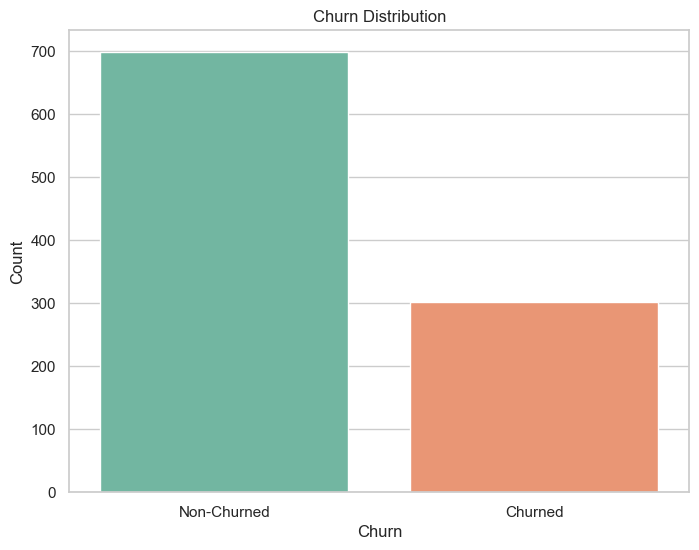

In [17]:
# Use plots to understand trends between features and churn.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
# Plot churn distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=dataset, palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Churned', 'Churned'])
plt.show()
# Plot churn

# Preprocess the data

In [19]:
# Scale or normalize features if necessary.
from sklearn.preprocessing import StandardScaler

# Select features
features = dataset.drop("churn", axis=1)
target = dataset["churn"]

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features)
print("Scaled features:", scaled_features[:5])  # Display first 5 scaled features


Scaled features: [[-0.22445038  1.23499368 -0.53034607  1.29981644  0.66156577  0.40439931]
 [ 0.77459716 -0.72643328  0.56599529 -0.99299984  2.4117981   1.39729686]
 [-0.21229537  0.7827002   0.85366693  0.10448814 -1.03106101  0.08351573]
 [-0.07405485 -0.59866395  0.73521217 -0.72140253  0.34632299  0.08293943]
 [ 0.02538898 -0.93638294 -0.08888025  0.83375029  0.92018751  0.235209  ]]


# Split the dataset

In [ ]:
# Use train_test_split to split into training and testing sets (e.g., 80/20 split).
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (800, 6) (800,)
Testing set shape: (200, 6) (200,)


# Train Model

In [32]:
# Train Logistic Regression model.

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [33]:
X_test

array([[-0.71496384, -1.62640381, -0.86009691, -0.98794508,  0.15915621,
         0.45341193],
       [ 0.74974211, -0.54315264,  0.79564782,  0.3215198 , -1.60052017,
        -1.42138375],
       [-0.80130498, -0.46312203, -1.10810681, -0.51383029, -0.09249509,
        -0.15020852],
       ...,
       [ 0.23614241, -0.58999207, -0.62157795, -0.91204011,  0.38198619,
         0.05258844],
       [-0.16711448, -1.02622244, -0.5112345 , -0.68299021, -0.22849861,
        -0.06331996],
       [ 0.06005987,  0.99705963,  2.29843638, -1.64981425, -0.16979798,
        -1.01431281]], shape=(200, 6))

In [34]:
y_test

521    0
737    0
740    0
660    0
411    0
      ..
408    0
332    0
208    0
613    0
78     1
Name: churn, Length: 200, dtype: int64

# Evaluate Model
  Use metrics: Accuracy, Precision, Recall, F1 Score, Confusion Matrix, ROC-AUC.

In [45]:
# Evaluate the model using accuracy, precision, recall, and F1-score.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Model Evaluation Metrics:
Accuracy: 68.00%
Precision: 45.98%
Recall: 70.18%
F1 Score: 55.56%


# Interpret results


In [48]:
import pandas as pd

# After training
coefficients = model.coef_[0]
feature_names = dataset.drop("churn", axis=1).columns  # Exclude target column

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=True)

print(coef_df)

print("The positive coefficients indicate features that increase the likelihood of churn,\nwhile negative coefficients indicate features that decrease the likelihood of churn.")

          Feature  Coefficient
3    credit_score    -0.320695
0             age    -0.053485
2  spending_score     0.063108
1   annual_income     0.317565
4          tenure     0.522245
5  website_visits     0.646816
The positive coefficients indicate features that increase the likelihood of churn,
while negative coefficients indicate features that decrease the likelihood of churn.


# Final graph

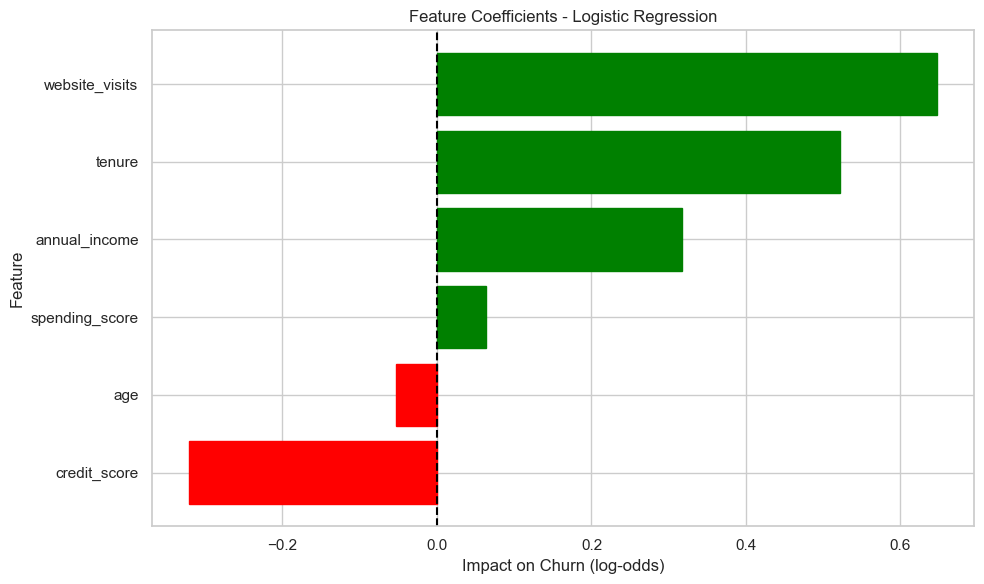

In [49]:

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(coef_df["Feature"], coef_df["Coefficient"])
plt.axvline(x=0, color='black', linestyle='--')
plt.title("Feature Coefficients - Logistic Regression")
plt.xlabel("Impact on Churn (log-odds)")
plt.ylabel("Feature")

# Highlight positive and negative
for bar in bars:
    if bar.get_width() > 0:
        bar.set_color('green')
    else:
        bar.set_color('red')

plt.tight_layout()
plt.show()

# The graph shows that:

Green bars = features that increase churn

Red bars = features that reduce churn

The length of the bar = how strong the impact is